In [2]:
import os
import sys
import re
import datetime
import pandas as pd
#import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
shared_drive = '/Volumes/npsg/tecan/SourceData/SecondStage' #'N:/tecan/SourceData/SecondStage/'
#shared_drive = '/Users/trinhsk/Documents/pythonScripts/'

list_file_names = []
int_start_sample_pos = 0
int_start_plt_loc = 0

def readFiles(rack_code):
    global list_file_names
    file_name = ''
    for fi in os.listdir(shared_drive):
        if fi.endswith('.tsl') and 'and' not in fi:
            if rack_code in fi:
                try:
                    file_mtime = os.stat(os.path.join(shared_drive,fi)).st_mtime
                    if datetime.datetime.fromtimestamp(file_mtime) < datetime.datetime.today():
                        file_name = os.path.join(shared_drive,fi)
                        list_file_names.append(fi)
                        with open(file_name, 'r') as f:
                            file_content = f.readlines()
                except ValueError:
                    pass
    return file_content


def replace_tsl_values(file2): 
    enum_ = 1
    new_tsl = []
    global int_start_plt_loc
    global int_start_sample_pos

    for i,line in enumerate(file2[5:]):
        if 'FLUSH' in line or 'STD' in line or 'SHUTDOWN' in line:
            new_tsl.append(line)
        else:
            try:
                plt_loc = re.search('\tP\d{1,2}S', line).group(0)
                if int(plt_loc[2:len(plt_loc)-1]) > 9:
                    padding = ""
                else:
                    padding = "0"
                
                new_tsl.append(line.replace(plt_loc, f'\tP{padding}{str(int_start_plt_loc)}S'))

                sample_num = re.search('\t(?![0])\d{1,2}\t', line).group(0)
                new_tsl[i] = new_tsl[i].replace(sample_num, f'\t{str(int_start_sample_pos)}\t')
                int_start_sample_pos += 1
                if enum_ % 4 == 0:
                    int_start_plt_loc += 1
                enum_ += 1
            except AttributeError as e:
                pass
    return new_tsl

def init_start_nums(file1):
    global int_start_sample_pos
    global int_start_plt_loc
    str_start_sample_pos = re.search('\t(?![0])\d{1,2}\t', file1[len(file1)-6]).group(0)
    int_start_sample_pos = int(str_start_sample_pos) + 1
    str_start_plt_loc = re.search('\tP\d{1,2}S', file1[len(file1)-6]).group(0)
    int_start_plt_loc = int(str_start_plt_loc[2:len(str_start_plt_loc)-1]) + 1

In [8]:

input_file_name1 = '15191201030'
input_file_name2 = '15191201040'
list_of_racks = sorted([input_file_name1] + [input_file_name2])
file1 = readFiles(list_of_racks[0])
file2 = readFiles(list_of_racks[1])
init_start_nums(file1)
top_tsl = file1[:len(file1)-3]
bottom_tsl = replace_tsl_values(file2)
new_tsl = top_tsl + bottom_tsl
date_now = datetime.datetime.today().strftime("%d%m%Y") 
trunc_filename1 = list_file_names[0].split('_')[2].replace('.tsl','')
trunc_filename2 = list_file_names[1].split('_')[2].replace('.tsl','')
#with open(f"{shared_drive}/{date_now}_secStg_{trunc_filename1}_and_{trunc_filename2}.tsl", 'w') as f:
#    for line in new_tsl:
#        f.write(line)

In [3]:
export_file = '/Users/trinhsk/Downloads/sample_export_file.csv'

In [4]:
raw_df = pd.read_csv(export_file)
raw_df.head()

,Step Info
0,------------------
1,Iteration:6
2,Injection:6
3,Sample Name:L81397_5
4,Sample Description:FB02648587


In [5]:
df = raw_df.copy()

In [25]:
df.iloc[10:]

,Step Info
10,Run Name:1519070103_1519070104__MTP_TBATA_HITS_G5
11,Run Date:7/30/2019 2:17:36 PM
12,Method Start Time:7/30/2019 3:25:32 PM
13,Operator Name:Administrator
14,Application Version:3.0.26.0
15,Application Patches:TRILUTION LC 3.0 Service P...
16,------------------
17,Channel Info\t Channel Info\t Channel Info\t ...
18,------------------\t------------------\t------...
19,Channel Name:254\tChannel Name:280\tChannel Na...


In [83]:
field_names = ['iteration', 'sample_well', 'sample_name', 'barcode', 'run_name', 'run_date', 'method_start_time']
field_idices = [1,2,3,4,10,11,12]
field_dict = {}
for i,fn in zip(field_idices, field_names):
    field_dict[fn] = df.iloc[i].values[0].split(':',1)[1]

In [84]:
field_dict

{'iteration': '6',
 'sample_well': '6',
 'sample_name': 'L81397_5',
 'barcode': 'FB02648587',
 'run_name': '1519070103_1519070104__MTP_TBATA_HITS_G5',
 'run_date': '7/30/2019 2:17:36 PM',
 'method_start_time': '7/30/2019 3:25:32 PM'}

In [7]:
channel_names = [ch.split(':')[1] for ch in df.iloc[19].values[0].split('\t')]

In [32]:
channel_names

['254', '280', '320', 'FC']

In [47]:
ch_1 = []
ch_2 = []
ch_3 = []
ch_4 = []

for i, r in df.iloc[26:].iterrows():
    tmp_ = r[' Step Info'].split('\t')
    if i % 10 == 0:
        ch_1.append(tmp_[0])
        ch_2.append(tmp_[1])
        ch_3.append(tmp_[2])
        ch_4.append(tmp_[3])

In [48]:
data_dict = {ch_nm : ch_nbr for ch_nm, ch_nbr in zip(channel_names, [ch_1, ch_2, ch_3, ch_4])}

In [49]:
plot_df = pd.DataFrame(data = data_dict)
plot_df.head()

,254,280,320,FC
0,7.446E-05,6.497E-05,5.706E-05,4.533E-05
1,1.515E-05,1.02E-06,3.8E-06,3.001E-05
2,1.491E-05,2.269E-05,2.218E-05,5.386E-05
3,2.967E-05,4.309E-05,2.267E-05,3.925E-05
4,5.732E-05,5.827E-05,5.173E-05,3.591E-05


In [394]:
# change to float datatype 

for ch in channel_names:
    plot_df[ch] = plot_df[ch].astype('float')

### Sample Rate:

\begin{align}
    {12.62}{min} * {60}{sec} * 10 \frac{measure}{sec}
\end{align}

In [51]:
12.62*60*10

7571.999999999999

In [52]:
plot_df.shape

(7572, 4)

In [61]:
"sample rate is: {0}".format(df.iloc[20].values[0].split('\t',1)[0].split(':')[1])

'sample rate is: 10'

In [395]:
plot_df.describe()

,254,280,320,FC
count,757.000000,757.000000,757.000000,757.000000
mean,0.337444,0.302850,0.206497,0.337371
std,0.462183,0.407083,0.340400,0.462118
min,-0.000087,-0.000087,-0.000037,-0.000042
25%,0.014275,0.007375,0.002450,0.014264
50%,0.042545,0.025834,0.011517,0.042509
75%,0.518205,0.502764,0.337285,0.518267
max,1.999995,2.001224,2.000486,1.999995


In [53]:
xs = np.linspace(0,12.62,plot_df.shape[0])

In [191]:
idx_15, idx_9, idx_125 = (np.where((xs<j+0.01) & (xs>j-0.01))[0][0] for j in [1.5, 9, 12.5])

In [473]:
idx_15, idx_9, idx_125

(90, 539, 749)

In [444]:
grad_neg = -140 # -70%/0.5 min 
grad_pos = 70/7.5# 70%/7.5 min 

### equation of the positive line

\begin{align}
    y = m*x + b\\
    b = y - m*x
\end{align}

In [446]:
y2 = 100
x2 = 9

b_pos = y2 - grad_pos*x2
b_pos

16.0

### equation of the negative line

In [445]:
x2 = 12.5

b_neg = y2 - grad_neg*x2
b_neg

1850.0

In [454]:
def calc_y(grad, x, b):
    """
    y = mx + b,
    x in mins 
    grad is gradient %/min
    
    """
    if grad == grad_neg:
        assert 12.5 <= x <= 13, "x can only take values from 12.5-13 mins" 
        # convert to seconds
        # this this is a download slope, calculate the difference from 100% mobile phase
        pct = grad*x + b 
    else:
        assert 1.5 <= x <= 9, "x can only take values from 1.5-9 mins"
        pct = grad*x + b
    return pct 

In [455]:
for t in np.linspace(12.5,13,10):
    print(calc_y(grad_neg, t, b_neg))

100.0
92.22222222222217
84.44444444444457
76.66666666666674
68.88888888888891
61.111111111111086
53.33333333333326
45.55555555555543
37.77777777777783
30.0


In [457]:
[calc_y(grad_pos,t, b_pos) for t in xs[idx_15:idx_9]]

[30.022222222222226,
 30.178024691358026,
 30.33382716049383,
 30.489629629629633,
 30.645432098765433,
 30.801234567901236,
 30.95703703703704,
 31.11283950617284,
 31.268641975308643,
 31.424444444444447,
 31.580246913580247,
 31.736049382716054,
 31.891851851851854,
 32.04765432098766,
 32.203456790123454,
 32.35925925925926,
 32.51506172839507,
 32.67086419753087,
 32.82666666666667,
 32.982469135802475,
 33.13827160493827,
 33.294074074074075,
 33.44987654320988,
 33.60567901234568,
 33.76148148148148,
 33.91728395061729,
 34.07308641975309,
 34.22888888888889,
 34.384691358024696,
 34.540493827160496,
 34.696296296296296,
 34.8520987654321,
 35.0079012345679,
 35.1637037037037,
 35.31950617283951,
 35.47530864197531,
 35.63111111111111,
 35.78691358024692,
 35.94271604938272,
 36.09851851851852,
 36.254320987654324,
 36.41012345679013,
 36.565925925925924,
 36.72172839506173,
 36.87753086419754,
 37.03333333333333,
 37.18913580246914,
 37.34493827160494,
 37.50074074074074,
 37.6

In [476]:
# get the difference between each value in xs which are generated
rate_change = np.mean(np.diff(xs))
rate_change

In [461]:
# extend the xs by these values

phase_5 = np.arange(12.62, 15, rate_change)
phase_5

array([12.62      , 12.63669312, 12.65338624, 12.67007937, 12.68677249,
       12.70346561, 12.72015873, 12.73685185, 12.75354497, 12.7702381 ,
       12.78693122, 12.80362434, 12.82031746, 12.83701058, 12.8537037 ,
       12.87039683, 12.88708995, 12.90378307, 12.92047619, 12.93716931,
       12.95386243, 12.97055556, 12.98724868, 13.0039418 , 13.02063492,
       13.03732804, 13.05402116, 13.07071429, 13.08740741, 13.10410053,
       13.12079365, 13.13748677, 13.15417989, 13.17087302, 13.18756614,
       13.20425926, 13.22095238, 13.2376455 , 13.25433862, 13.27103175,
       13.28772487, 13.30441799, 13.32111111, 13.33780423, 13.35449735,
       13.37119048, 13.3878836 , 13.40457672, 13.42126984, 13.43796296,
       13.45465608, 13.47134921, 13.48804233, 13.50473545, 13.52142857,
       13.53812169, 13.55481481, 13.57150794, 13.58820106, 13.60489418,
       13.6215873 , 13.63828042, 13.65497354, 13.67166667, 13.68835979,
       13.70505291, 13.72174603, 13.73843915, 13.75513228, 13.77

In [475]:
xs_ext = np.concatenate((xs,phase_5))

In [467]:
idx_13 = np.where((phase_5>12.99) & (phase_5<13.02))[0][0]
idx_13

23

In [472]:
solv_grad_data = np.concatenate((np.repeat(30, idx_15), \
                np.linspace(30, 100, idx_9-idx_15), \
                np.repeat(100, idx_125-idx_9), \
                np.linspace(100,30,idx_13), \
                np.repeat(30, len(phase_5) - idx_13)
               ))

solv_grad_data

array([ 30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.        ,
        30.        ,  30.        ,  30.        ,  30.  

In [410]:
# correct baseline to be at zero by add to all values the min value

d_min = plot_df.min().min() 

for cn in channel_names:
    plot_df[cn] = plot_df[cn].apply(lambda x : x+ abs(d_min))

In [375]:
d_min

-1.559e-05

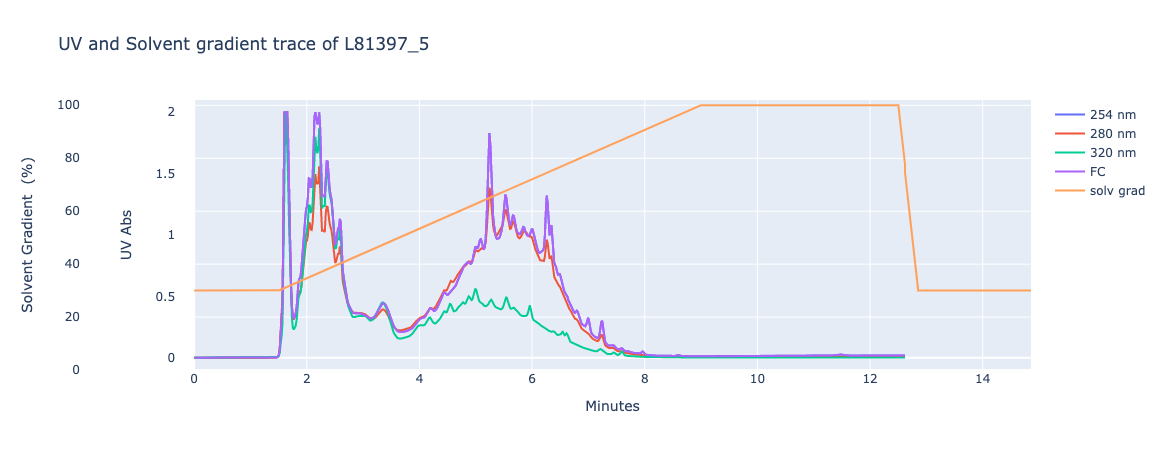

In [481]:
fig = go.Figure()
# Create figure with secondary y-axis
xs = np.linspace(0,12.62,plot_df.shape[0])

for cn in plot_df.columns:
    if re.search(r'\d', cn):
        name = f'{cn} nm'
    else:
        name = cn 
        
    ys_ = plot_df[cn].to_numpy()
    fig.add_trace(go.Scatter(x=xs, y=ys_,
                        mode='lines',
                        name=name)
                        )
    
fig.add_trace(go.Scatter(x=xs_ext, y=solv_grad_data,
                    mode='lines',
                    name='solv grad', yaxis="y2")
                    )

fig.update_layout(
        title = "UV and Solvent gradient trace of {}".format(field_dict['sample_name']),
        xaxis = dict(
            title = "Minutes",
            domain=[0.12, 1]
        ),
        yaxis = dict(
        #scaleanchor = "x",
        title = "UV Abs",
        range = [-0.1,2.1],
        position = 0.1,
        showgrid = False
        ),
        yaxis2 = dict(
        title = "Solvent Gradient  (%)",
        anchor="free",
        domain=[0.1,1],
        overlaying="y",
        side="left",
        position=0,
        range=[0,102])

    )

config = {
    'displayModeBar': True,
    'editable': True,
    'showLink':False,
    'displaylogo': False
}

fig.show(config=config)
    


In [336]:
y2 = .1* x +8 + delta

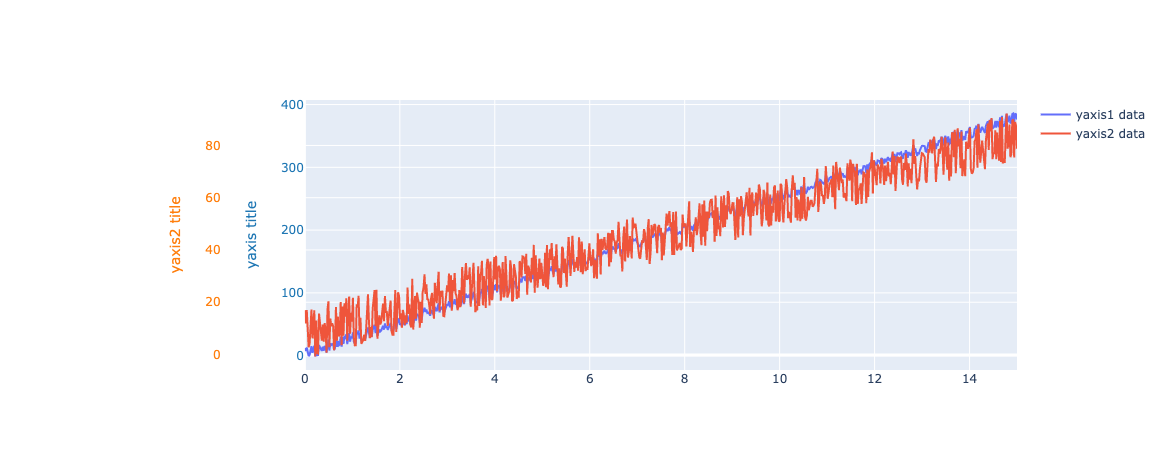

In [340]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.linspace(0,15,plot_df.shape[0]),
    y=y,
    name="yaxis1 data"
))


fig.add_trace(go.Scatter(
    x=np.linspace(0,15,plot_df.shape[0]),
    y=y2,
    name="yaxis2 data",
    yaxis="y2"
))


# Create axis objects
fig.update_layout(
    xaxis=dict(
        domain=[0.24, 1]
    ),
    yaxis=dict(
        title="yaxis title",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="yaxis2 title",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor= "free",
        overlaying="y",
        side="left",
        position=0.15
    ))
